###  *********************************************************************************
# Problem Statement 
### *********************************************************************************
A bike company wants to know:
Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

#to print all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Reading the data

In [2]:
Data = pd.read_csv("day.csv")

In [3]:
Data.shape
Data.head()

(730, 16)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Note: 
- It is observed that the data has no missing values.
- a lot of character variables are marked integer because of the way data is collected. In the next step, they will be converted to character variable according to data dictionary mapping. Also, the numeric variables give a sense of order which leads to confusion. Hence remapping according to data dictionary is important

In [5]:
Data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data quality and data manipulation

Note:
- "instant" is the index column and "dteday" is the date variable. Hence it has no value in model building. so dropping it
- "casual" and "registered" add up to the target variable "cnt". Hence will not help in prdicting the target variable. So dropping them as well.

In [6]:
Data=Data.drop(['instant','dteday','casual','registered'], axis=1)

In [7]:
Data.shape

(730, 12)

List of variables where remapping according to data dictionary is required:
- season
- yr
- mnth
- holiday
- weekday
- workingday
- weathersit

In [8]:
Data['season'].value_counts()
Data['yr'].value_counts()
Data['mnth'].value_counts()
Data['holiday'].value_counts()
Data['weekday'].value_counts()
Data['workingday'].value_counts()
Data['weathersit'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

1    365
0    365
Name: yr, dtype: int64

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

0    709
1     21
Name: holiday, dtype: int64

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

1    499
0    231
Name: workingday, dtype: int64

1    463
2    246
3     21
Name: weathersit, dtype: int64

## Note:
- it is observed that among the above variable list, 3 variables i.e ['yr','holiday','workingday'] have only 2 levels which is "yes" or "no". Hence not remapping them and treating them as dummy variable.
-- yr : year (0: 2018, 1:2019)
-- holiday : wether day is a holiday or not (0: Not holiday, 1: Yes holiday)
-- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

##### Mapping the rest of the variables according to data dictionary

In [9]:
Data[['season']]=Data[['season']].apply(lambda x: x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))
Data['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [10]:
Data[['mnth']]=Data[['mnth']].apply(lambda x: x.map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July',8: 'August',9: 'September',10: 'October',11: 'November',12: 'December'}))
Data['mnth'].value_counts()

May          62
March        62
August       62
July         62
October      62
December     62
January      62
June         60
September    60
April        60
November     60
February     56
Name: mnth, dtype: int64

In [11]:
Data[['weekday']]=Data[['weekday']].apply(lambda x: x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}))
Data['weekday'].value_counts()

Mon      105
Wed      105
Tues     105
Sun      104
Thurs    104
Sat      104
Fri      103
Name: weekday, dtype: int64

##### Note:
- weathersit has 4 levels as mentioned below:
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
        - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
as the mapping is quite long, below short mapping is used:
        - 1: clear_to_cloudy
        - 2: cloudy_to_misty
        - 3: misty_to_light_rain_snow
        - 4: light_to_hevay_rain_snow

In [12]:
Data[['weathersit']]=Data[['weathersit']].apply(lambda x: x.map({1: 'clear_to_cloudy', 2: 'cloudy_to_misty', 3: 'misty_to_light_rain_snow', 4: 'light_to_hevay_rain_snow'}))
Data['weathersit'].value_counts()

clear_to_cloudy             463
cloudy_to_misty             246
misty_to_light_rain_snow     21
Name: weathersit, dtype: int64

### Note:
 - data is clean and all the required changes are done. From describe function, it is observed that there is no missing values as well and no outliers. hence can proceed with modelling

## Before proceeding with Model, visualization of data and data understanding

In [13]:
Data.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

<AxesSubplot:xlabel='temp', ylabel='Density'>

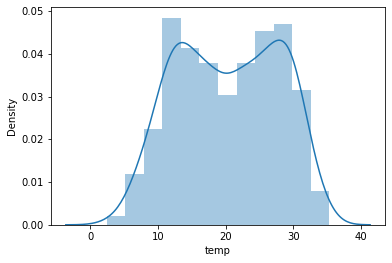

<AxesSubplot:xlabel='atemp', ylabel='Density'>

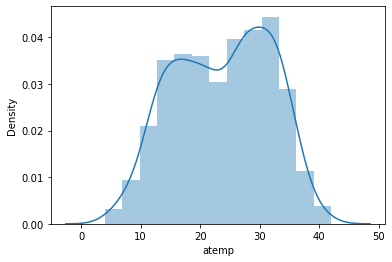

<AxesSubplot:xlabel='hum', ylabel='Density'>

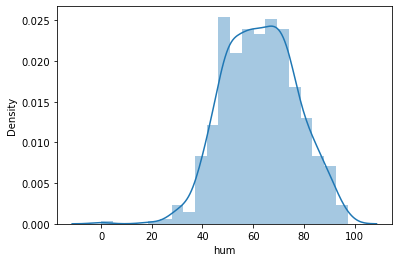

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

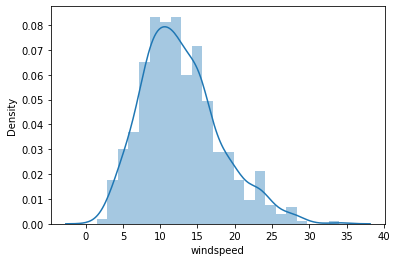

<AxesSubplot:xlabel='cnt', ylabel='Density'>

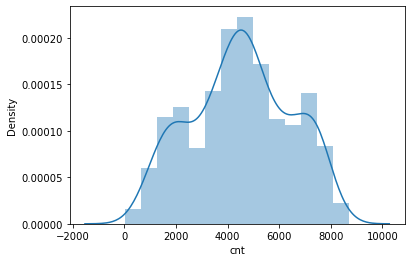

In [14]:
import warnings
warnings.filterwarnings('ignore')
list_var=['temp','atemp','hum','windspeed','cnt']
for i in list_var:
    sns.distplot(Data[i])
    plt.show()


### Note:
- from the above plots of character variables, it is observed that all the variables approximately follows normal distribution

##### Now plotting bloxplot for the categorical variable and observing the relationship with the dependent variable

<Figure size 1800x1800 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='season', ylabel='cnt'>

<AxesSubplot:>

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

<AxesSubplot:>

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

<AxesSubplot:>

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

<AxesSubplot:>

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

<AxesSubplot:>

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

<AxesSubplot:>

<AxesSubplot:xlabel='yr', ylabel='cnt'>

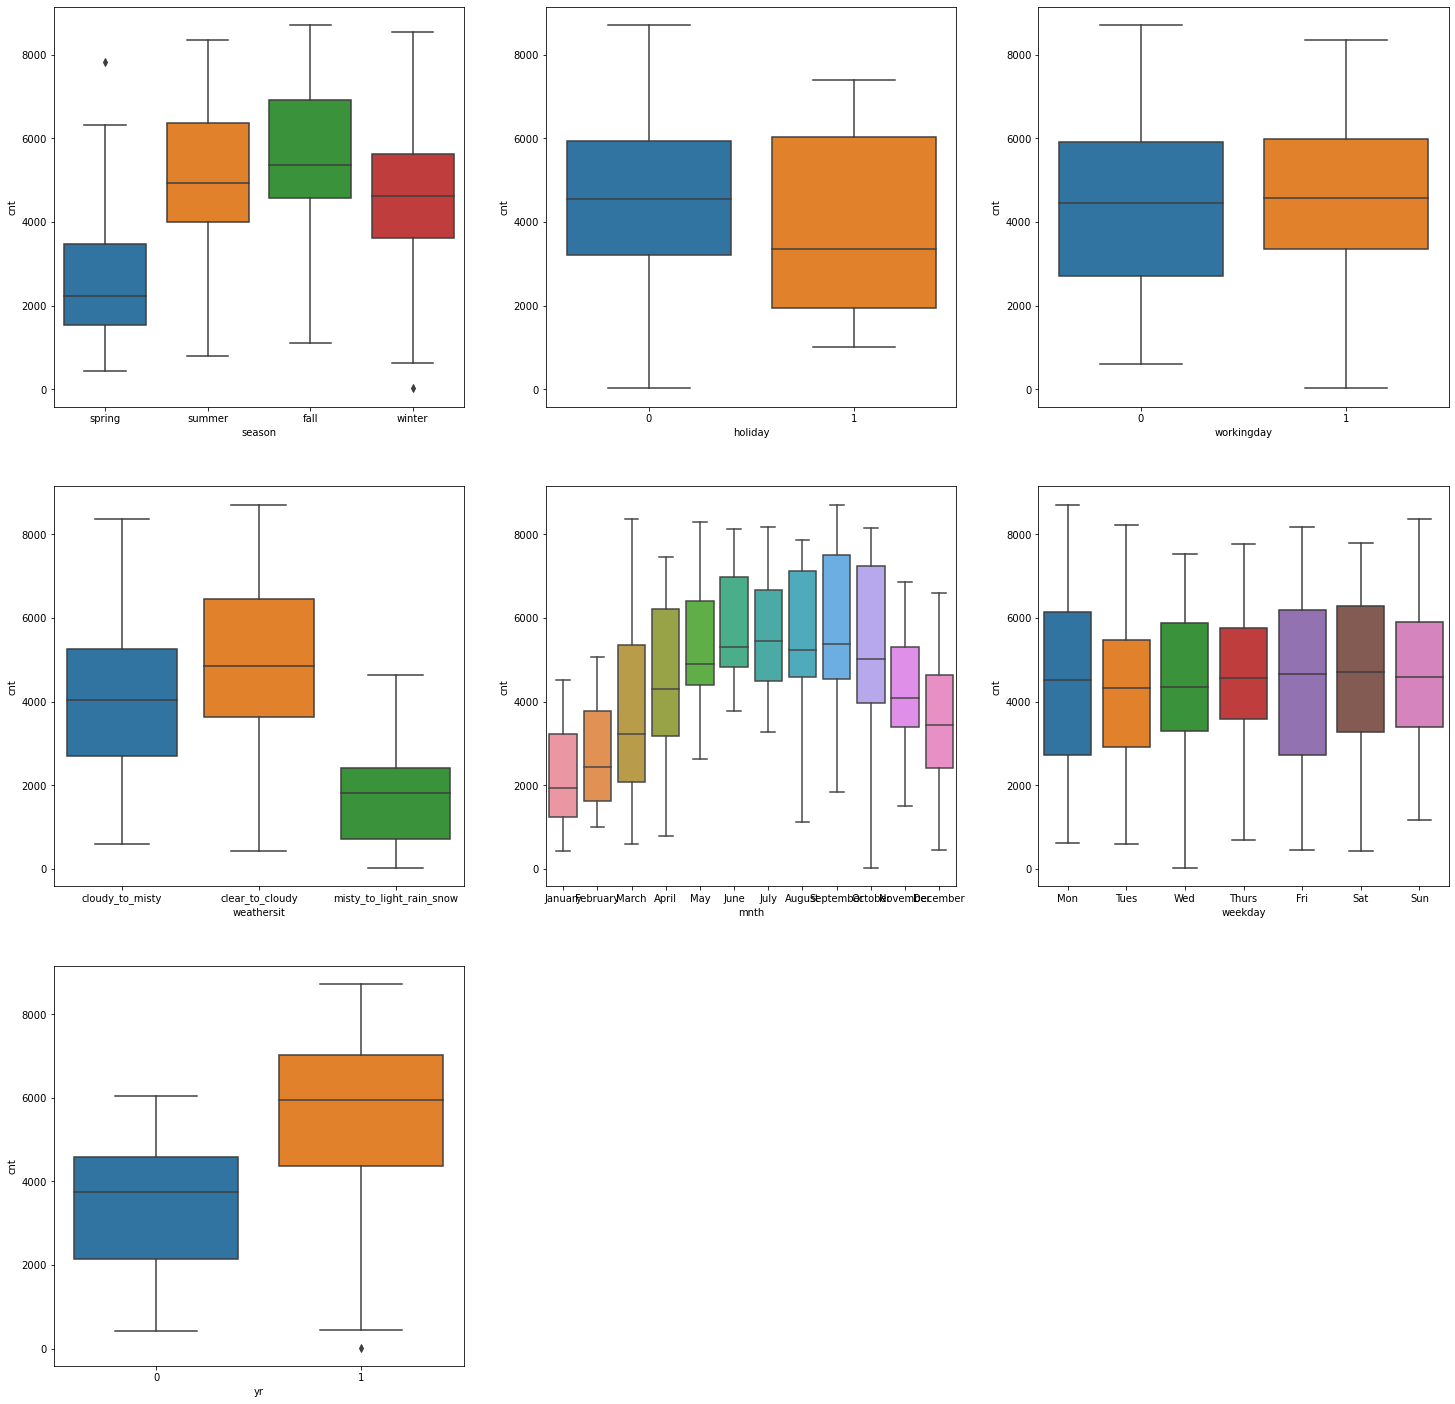

In [15]:
plt.figure(figsize=(25, 25))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season',y ='cnt', data =Data)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday',y ='cnt', data =Data)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday',y ='cnt', data =Data)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit',y ='cnt', data =Data)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth',y ='cnt', data =Data)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday',y ='cnt', data =Data)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr',y ='cnt', data =Data)
plt.show()

### Notes:
- 2019 has more bike rentals than 2018
- clear to cloudy weather situation has more bike rentals
##### this kind of inferences can be drawn from above plots

### Visualizing numeric variables and observing multicollinearity among independent variables along with collinearity among dependent and independent variables

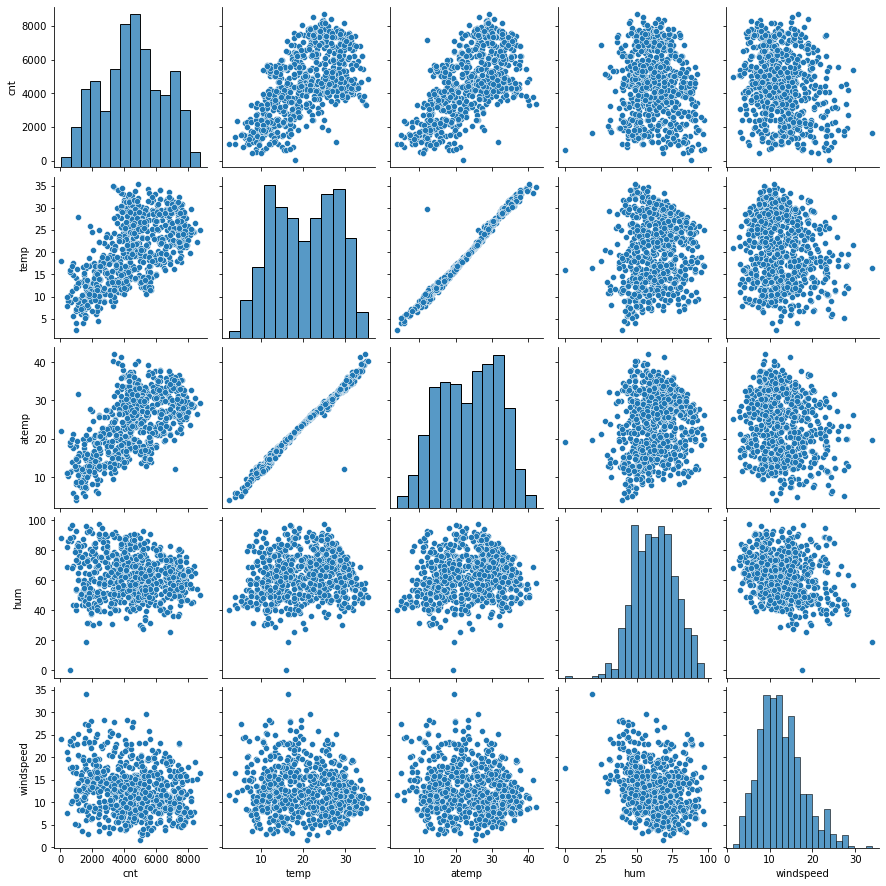

In [16]:
list_var=['cnt','temp','atemp','hum','windspeed']
sns.pairplot(Data[list_var])
plt.show()

In [17]:
Data.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


<Figure size 1440x1440 with 0 Axes>

[Text(0.5, 0, 'yr'),
 Text(1.5, 0, 'holiday'),
 Text(2.5, 0, 'workingday'),
 Text(3.5, 0, 'temp'),
 Text(4.5, 0, 'atemp'),
 Text(5.5, 0, 'hum'),
 Text(6.5, 0, 'windspeed'),
 Text(7.5, 0, 'cnt')]

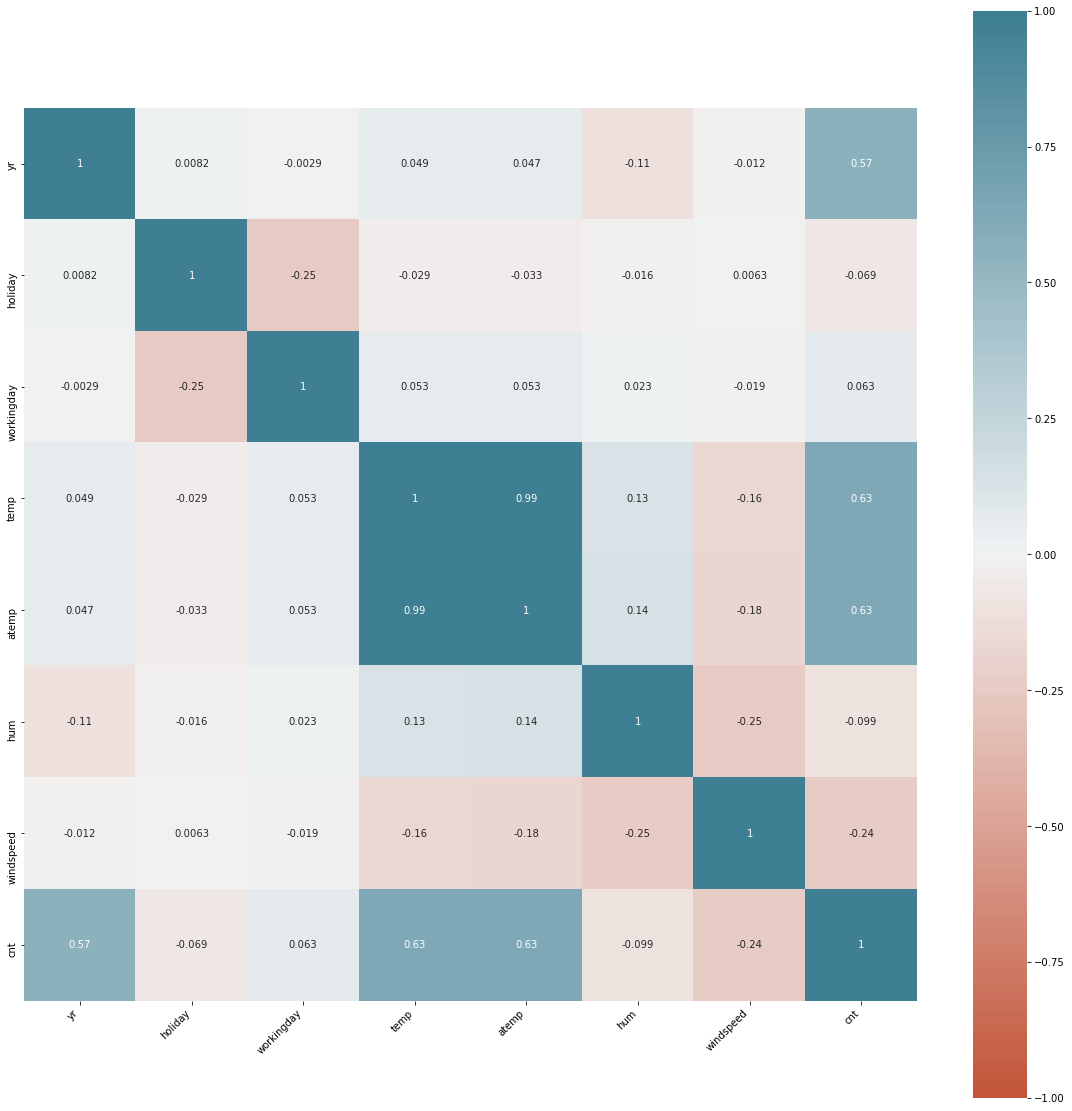

In [18]:
plt.figure(figsize=(20, 20))
corr=Data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
plt.show()

##### removing atemp variable as it is highly correlated with temp variable

In [19]:
Data=Data.drop('atemp',axis=1) 
Data.shape

(730, 11)

# Model Development

#### Below steps are followed in model development:
- STEP 1:  data preperation is done by creating dummy variables and formatting rest of the variables as per requirement
- STEP 2:  dividing the data into training set and test set
- STEP 3:  Scaling the numeric vriables for better interpretation though prediction will not get affected
- STEP 4:  Building model with all the features using OLS technique
- STEP 5:  Checking VIF and dropping features with high multi collinearity
- STEP 6:  To arrive at final model and dropping features, used RFE i.e recursive feature elimination
- STEP 7:  Checked VIF again and dropped features with high VIF 
- STEP 8:  Rerun the model and then arrived at final model by evaluating basis adjusted R2 and F statistic
- STEP 9:  Residual analysis to see the distribution of error term and observe homoskedasticity as well. Ensuring assumptions of linear regression model is holding
- STEP 10: Deciding and concluding final model and observing its performance in test set as well to finalise.

### STEP 1: Dummy Creation

In [20]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [21]:
Data_categorical=Data[["season","mnth","weekday","weathersit"]]
Data_dummies = pd.get_dummies(Data_categorical, drop_first=True)
Data_dummies.head()

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_October,mnth_September,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_cloudy_to_misty,weathersit_misty_to_light_rain_snow
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
Data_dummies.shape

(730, 22)

##### Note: not creating dummy variable for ["yr","holiday","workingday"] beacuse this variables are already in binary format and acts as pseudo dummy variables only. No need to increase the number of variables

In [23]:
# Dropping the columns ["season","mnth","weekday","weathersit"] from original data
Data_1 = Data.drop(["season","mnth","weekday","weathersit"], axis=1)
# Concatenating dummy variables for ["season","mnth","weekday","weathersit"] with the original data
Data_final = pd.concat([Data_1, Data_dummies], axis=1)
Data_final.shape
Data_final.head(2)

(730, 29)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_cloudy_to_misty,weathersit_misty_to_light_rain_snow
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0


### STEP 2:  dividing the data into training set and test set

In [24]:
np.random.seed(0)
Data_final_train, Data_final_test = train_test_split(Data_final, train_size=0.7, test_size=0.3, random_state=100)
Data_final_train.shape
Data_final_test.shape

(510, 29)

(219, 29)

### STEP 3:  Scaling the numeric vriables

In [25]:
# creating the object for scaling
scaler= MinMaxScaler()
# Applying the scaling object to all the numeric variables and fitting as well as transforming the training set
num_var = ['cnt','temp','hum','windspeed']
Data_final_train[num_var] = scaler.fit_transform(Data_final_train[num_var])

In [26]:
# to check if the scaling is done properly:
Data_final_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_cloudy_to_misty,weathersit_misty_to_light_rain_snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### STEP 4:  Building model with all the features using OLS technique

In [27]:
y_train = Data_final_train.pop('cnt')
X_train = Data_final_train
y_train.head(2)
X_train.head(2)

653    0.864243
576    0.827658
Name: cnt, dtype: float64

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_August,...,mnth_October,mnth_September,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_cloudy_to_misty,weathersit_misty_to_light_rain_snow
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
# Adding the constant
X_train_sm = sm.add_constant(X_train)
# Using OLS method to fit the MLRM model
model_1 = sm.OLS(y_train, X_train_sm).fit()
# Checking the beta coefficient values of the variables
model_1.params
# Getting the significance of the model and variales
model_1.summary()

const                                  0.242930
yr                                     0.232116
holiday                                0.006726
workingday                             0.093651
temp                                   0.450562
hum                                   -0.151340
windspeed                             -0.186453
season_spring                         -0.048159
season_summer                          0.038725
season_winter                          0.105847
mnth_August                            0.014404
mnth_December                         -0.045586
mnth_February                         -0.032282
mnth_January                          -0.062777
mnth_July                             -0.040350
mnth_June                             -0.002972
mnth_March                             0.001045
mnth_May                               0.023940
mnth_November                         -0.041851
mnth_October                           0.007534
mnth_September                         0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.74e-182
Time:                        15:14:52   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.2429      0.035      6.854      0.000       0.173       0.313
yr                                      0.2321      0.008     28.820      0.000       0.216       0.248
holiday                                 0.0067      0.024      0.278      0.781      -0.041       0.054
workingday                              0.0937      0.012      7.783      0.000       0.070       0.117
temp                                    0.4506      0.046      9.734      0.000       0.360       0.542
hum                                    -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed                              -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring                          -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer                           0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter                           0.1058      0.028      3.794      0.000       0.051       0.161
mnth_August                             0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_December                          -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_February                          -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_January                           -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_July                              -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_June                              -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_March                              0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May                                0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_November                          -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_October                            0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_September                          0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon                             0.0985      0.013      7.300      0.000       0.072       0.125
weekday_Sat                            -0.0038      0.015     -0.263      0.793      -0.033       0.025
weekday_Sun                             0.0054      0.015      0.362      0.718      -0.024       0.035
weekday_Thurs                          -0.0135      0.015     -0.917      0.359      -0.042       0.015
weekday_Tues                            0.0440      0.014      3.213      0.001       0.017       0.071
weekday_Wed                            -0.0155      0.015     -1.06

## Note:
- the model has an adjusted R2 value of 84.5% which means that all the variables can explaing 84.5% variance of the target variable. It is pretty good model.
- it is observed that the p value for a lot of variables is higher than 0.05 and hence ideally we should drop the insignificant variables.
- Before dropping, Checking the VIF for these feature variabe because high p value combined with high VIF confirms the number of features that we can drop from this step

### STEP 5:  Checking VIF

In [29]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,86.81
20,weekday_Mon,19.72
24,weekday_Tues,18.35
6,season_spring,10.79
8,season_winter,9.50
7,season_summer,8.29
3,temp,7.12
17,mnth_November,6.80
18,mnth_October,6.59
9,mnth_August,6.43


ideally we should Drop the variables with high pvalue and high vif and then re run the model and drop accordingly in the below order:
1.high pvalue and high vif
2.high pvalue and low vif
3.low pvalue and high vif

and then finally keep:
4.low pvalue and low vif and finalize.

But it is cumbersome process to manually do these. hence going forward with RFE technique
    


### Step 6: using RFE to select features in a automated fashion

In [30]:
# RFE with 10 features
LR = LinearRegression()
RFE_1 = RFE(LR, 10)
# Fit with 10 features
RFE_1.fit(X_train, y_train)

print(RFE_1.support_)           
print(RFE_1.ranking_) 


# RFE with 15 features
LR = LinearRegression()
RFE_2 = RFE(LR, 15)
# Fit with 15 features
RFE_2.fit(X_train, y_train)

print(RFE_2.support_)           
print(RFE_2.ranking_) 

RFE(estimator=LinearRegression(), n_features_to_select=10)

[ True  True False  True  True  True  True False  True False False False
 False  True False False False False False  True False False False False
 False False False  True]
[ 1  1  5  1  1  1  1  3  1 11  8  9  6  1 18 19 10  7 15  1  4 17 16 14
 12 13  2  1]


RFE(estimator=LinearRegression(), n_features_to_select=15)

[ True  True  True  True  True  True  True  True  True False False False
  True  True False False False False False  True  True False False False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  6  3  4  1  1 13 14  5  2 10  1  1 12 11  9
  7  8  1  1]


As RFE technique does not give detailed summary, hence using statsmodel to evaluate the models RFE_1 and RFE_2

In [31]:
##### RFE_1
# Subset the features selected by RFE_1
Col_RFE_1 = X_train.columns[RFE_1.support_]

# Subsetting training data for 15 selected columns
X_train_RFE_1 = X_train[Col_RFE_1]

# Add a constant to the model
X_train_RFE_1 = sm.add_constant(X_train_RFE_1)
X_train_RFE_1.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_winter,mnth_July,mnth_September,weathersit_misty_to_light_rain_snow
653,1.0,1,0,0.509887,0.575354,0.300794,0,1,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,1,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,0,0


In [32]:
# Fitting the model with 10 variables
Model_10var = sm.OLS(y_train, X_train_RFE_1).fit()   
print(Model_10var.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.53e-184
Time:                        15:14:53   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [33]:
##### RFE_2
# Subset the features selected by RFE_2
Col_RFE_2 = X_train.columns[RFE_2.support_]

# Subsetting training data for 15 selected columns
X_train_RFE_2 = X_train[Col_RFE_2]

# Add a constant to the model
X_train_RFE_2 = sm.add_constant(X_train_RFE_2)
X_train_RFE_2.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_January,mnth_July,mnth_September,weekday_Mon,weathersit_cloudy_to_misty,weathersit_misty_to_light_rain_snow
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,1,0


Note: the new model with 10 variables have very low dip in accuracy i.e. 82.6% wimth the model with all the variables i.e 84.5%.

In [34]:
# Fitting the model with 15 variables
Model_15var = sm.OLS(y_train, X_train_RFE_2).fit()   
print(Model_15var.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.31e-191
Time:                        15:14:53   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Note: the new model with 15 variables have very similar accuracy of 84.4% with the model with all the variables i.e 84.5%.

### STEP 7:  Checked VIF again and dropped features with high VIF

In [35]:
RFE_2_features=X_train_RFE_2.drop('const',axis=1)
vif = pd.DataFrame()
vif['Features'] = RFE_2_features.columns
vif['VIF'] = [variance_inflation_factor(RFE_2_features.values, i) for i in range(RFE_2_features.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
13,weathersit_cloudy_to_misty,2.29
0,yr,2.09
12,weekday_Mon,1.98


In [36]:
RFE_1_features=X_train_RFE_1.drop('const',axis=1)
vif = pd.DataFrame()
vif['Features'] = RFE_1_features.columns
vif['VIF'] = [variance_inflation_factor(RFE_1_features.values, i) for i in range(RFE_1_features.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
5,season_spring,2.40
0,yr,2.06
6,season_winter,1.98
7,mnth_July,1.40
8,mnth_September,1.20
9,weathersit_misty_to_light_rain_snow,1.11
1,holiday,1.04


##### So it is observed that all the variables are significant that is p value is less than 0.05 for the model RFE_1 i.e with 10 variables.
But VIF is high, so starting with dropping variabe 'hum'

In [37]:
X_train_RFE_1=X_train_RFE_1.drop("hum",axis=1)
X_train_RFE_1.head(2)

,const,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_July,mnth_September,weathersit_misty_to_light_rain_snow
653,1.0,1,0,0.509887,0.300794,0,1,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,1,0,0


In [38]:
# Fitting the model with 9 variables
Model_9var = sm.OLS(y_train, X_train_RFE_1).fit()   
print(Model_9var.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          5.33e-171
Time:                        15:14:53   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [39]:
RFE_1_features_1=X_train_RFE_1.drop('const',axis=1)
vif = pd.DataFrame()
vif['Features'] = RFE_1_features_1.columns
vif['VIF'] = [variance_inflation_factor(RFE_1_features_1.values, i) for i in range(RFE_1_features_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.40
3,windspeed,3.98
0,yr,2.06
4,season_spring,1.61
5,season_winter,1.37
6,mnth_July,1.34
7,mnth_September,1.20
8,weathersit_misty_to_light_rain_snow,1.06
1,holiday,1.04


##### the above model has all the variables with p value less than 0.05 and vif less than 5 and it is also 80.1% accurate in prediction. hence it is a good model

### STEP 8:  Rerun the model and then arrived at final model by evaluating basis adjusted R2 and F statistic

##### Trying to reduce features further and checking the drop in accuracy level

In [40]:
X_train_RFE_1=X_train_RFE_1.drop('const',axis=1)

In [41]:
# RFE with 5 features
LR = LinearRegression()
RFE_3 = RFE(LR, 5)
# Fit with 5 features
RFE_3.fit(X_train_RFE_1, y_train)

print(RFE_3.support_)           
print(RFE_3.ranking_) 

RFE(estimator=LinearRegression(), n_features_to_select=5)

[ True False  True  True  True False False False  True]
[1 2 1 1 1 4 3 5 1]


In [42]:
##### RFE_2
# Subset the features selected by RFE_2
Col_RFE_3 = X_train_RFE_1.columns[RFE_3.support_]

# Subsetting training data for 15 selected columns
X_train_RFE_3 = X_train_RFE_1[Col_RFE_3]

# Add a constant to the model
X_train_RFE_3 = sm.add_constant(X_train_RFE_3)
X_train_RFE_3.head()

,const,yr,temp,windspeed,season_spring,weathersit_misty_to_light_rain_snow
653,1.0,1,0.509887,0.300794,0,0
576,1.0,1,0.815169,0.264686,0,0
426,1.0,1,0.442393,0.255342,1,0
728,1.0,1,0.245101,0.663106,1,0
482,1.0,1,0.395666,0.188475,0,0


In [43]:
# Fitting the model with 9 variables
Model_5var = sm.OLS(y_train, X_train_RFE_3).fit()   
print(Model_5var.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     373.4
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          7.31e-167
Time:                        15:14:53   Log-Likelihood:                 433.36
No. Observations:                 510   AIC:                            -854.7
Df Residuals:                     504   BIC:                            -829.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [44]:
RFE_3_features_1=X_train_RFE_3.drop('const',axis=1)
vif = pd.DataFrame()
vif['Features'] = RFE_3_features_1.columns
vif['VIF'] = [variance_inflation_factor(RFE_3_features_1.values, i) for i in range(RFE_3_features_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.63
1,temp,3.37
0,yr,2.02
3,season_spring,1.49
4,weathersit_misty_to_light_rain_snow,1.04


hence above model is the best model because even after dropping 4 variables, accuracy is still at 78.5% and all the variables are significant

### STEP 9:  Residual analysis to see the distribution of error term and observe homoskedasticity as well. Ensuring assumptions of linear regression model is holding

In [45]:
y_train_cnt = Model_5var.predict(X_train_RFE_3)

##### Plotting the histogram for error term

<AxesSubplot:ylabel='Density'>

Text(0.5, 0.98, 'Error Terms')

Text(0.5, 0, 'Errors')

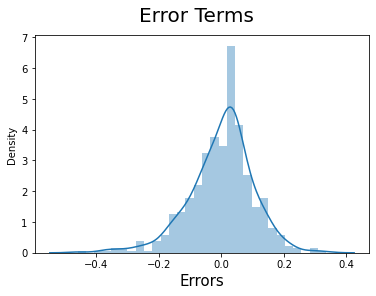

In [46]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 30)
fig.suptitle('Error Terms', fontsize = 20)    
plt.xlabel('Errors', fontsize = 15)                         

the error term is normally distributed an assumption is holding. hence we can go ahead with our model

### STEP 10: Deciding and concluding final model and observing its performance in test set as well to finalise.

Scaling the test set

In [47]:
X_train_RFE_3

,const,yr,temp,windspeed,season_spring,weathersit_misty_to_light_rain_snow
653,1.0,1,0.509887,0.300794,0,0
576,1.0,1,0.815169,0.264686,0,0
426,1.0,1,0.442393,0.255342,1,0
728,1.0,1,0.245101,0.663106,1,0
482,1.0,1,0.395666,0.188475,0,0
...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,0
578,1.0,1,0.863973,0.187140,0,0
53,1.0,0,0.202618,0.111379,1,0
350,1.0,0,0.248216,0.431816,0,0


In [48]:
num_var = ['cnt','temp','hum','windspeed']
Data_final_test[num_var] = scaler.transform(Data_final_test[num_var])
y_test = Data_final_test.pop('cnt')
X_test = Data_final_test

In [49]:
X_test_RFE_3 = X_test[RFE_3_features_1.columns]
X_test_RFE_3

,yr,temp,windspeed,season_spring,weathersit_misty_to_light_rain_snow
184,0,0.831783,0.084219,0,0
535,1,0.901354,0.153728,0,0
299,0,0.511964,0.334206,0,0
221,0,0.881625,0.339570,0,0
152,0,0.817246,0.537414,0,0
...,...,...,...,...,...
400,1,0.257562,0.287411,1,0
702,1,0.519232,0.283397,0,0
127,0,0.584649,0.069510,0,0
640,1,0.745598,0.052115,0,0


In [50]:
### adding the constant like training set
X_test_RFE_3 = sm.add_constant(X_test_RFE_3)
X_test_RFE_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   const                                219 non-null    float64
 1   yr                                   219 non-null    int64  
 2   temp                                 219 non-null    float64
 3   windspeed                            219 non-null    float64
 4   season_spring                        219 non-null    uint8  
 5   weathersit_misty_to_light_rain_snow  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(2)
memory usage: 9.0 KB


In [51]:
X_test_RFE_3.head()

,const,yr,temp,windspeed,season_spring,weathersit_misty_to_light_rain_snow
184,1.0,0,0.831783,0.084219,0,0
535,1.0,1,0.901354,0.153728,0,0
299,1.0,0,0.511964,0.334206,0,0
221,1.0,0,0.881625,0.339570,0,0
152,1.0,0,0.817246,0.537414,0,0


##### making the prediction on test set

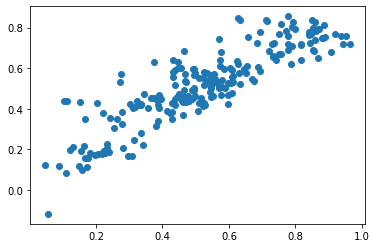

0.775065208538001

In [52]:
y_pred = Model_5var.predict(X_test_RFE_3)
fig = plt.figure()
plt.scatter(y_test, y_pred)
plt.show()
r2_score(y_test, y_pred)

From the above plot, it is proved that the model is performing well in test set. Also R2 in test set is 77.5% where as in the training data set it is 78.7%. So they are very close

# This is the final model for predicting count of daily bike rentals